In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with WMF model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.baseline.wmf import WMF

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/ML20M/')
# DATA_DIR = Path('../../data/Amazon Video Games/')
DATA_DIR = Path('../../data/Publiq/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = WMF

# L2 = [10 ** p for p in range(1, 5)]
# ALPHA = [10 ** p for p in range(0, 4)]
L2 = [50, 100, 200, 500]
ALPHA = [100, 150]
T = [300]
MAX_ITER = 20
HYPERPARAMS = {'l2': L2, 'alpha': ALPHA, 'max_iterations': MAX_ITER, 't': T}
HYPERPARAMS

{'l2': [50, 100, 200, 500],
 'alpha': [100, 150],
 'max_iterations': 20,
 't': [300]}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags
# HYPERPARAMS['t'] = t
del S, tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, None, Xval_in, Xval_out, HYPERPARAMS)

Training model WMF with hyperparameters {'l2': 50, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.521
Average Recall@100 0.703
Average nDCG@100 0.334
Training model WMF with hyperparameters {'l2': 100, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.522
Average Recall@100 0.699
Average nDCG@100 0.332
Training model WMF with hyperparameters {'l2': 200, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.516
Average Recall@100 0.701
Average nDCG@100 0.321
Training model WMF with hyperparameters {'l2': 500, 'alpha': 100, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.363
Average Recall@100 0.527
Average nDCG@100 0.221
Training model WMF with hyperparameters {'l2': 50, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.528
Average Recall@100 0.703
Average nDCG@100 0.333
Training model WMF with hyperparameters {'l2': 100, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.531
Average Recall@100 0.702
Average nDCG@100 0.334
Training model WMF with hyperparameters {'l2': 200, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.523
Average Recall@100 0.701
Average nDCG@100 0.328
Training model WMF with hyperparameters {'l2': 500, 'alpha': 150, 'max_iterations': 20, 't': 300}



Evaluating with 1000 users
Average Recall@20 0.44
Average Recall@100 0.652
Average nDCG@100 0.278



In [9]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.3344141946162683 achieved with {'l2': 100, 'alpha': 150, 'max_iterations': 20, 't': 300}."

## Evaluate model with optimal hyperparams on test set

In [10]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X)


CPU times: user 1min 32s, sys: 2min 10s, total: 3min 43s
Wall time: 11.1 s


In [11]:
%%time
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set



Evaluating with 1500 users
Average Recall@20 0.524
Average Recall@100 0.704
Average nDCG@100 0.337
CPU times: user 10.8 s, sys: 135 ms, total: 10.9 s
Wall time: 5.88 s


## Plot amount of items from long tail recommended

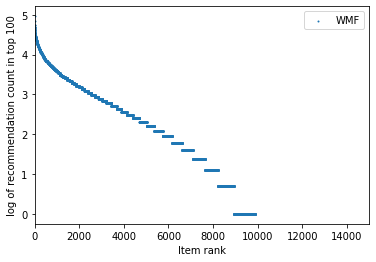

In [12]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["WMF"], k=100)